In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data_directory = "C:\\Users\\irina\\Documents\\UH\\Vizualization in Data Science DL\\suncharge\\data"
files = os.listdir(data_directory)
for file in files:
    print(file)

.ipynb_checkpoints
BOM.csv
CustomerPlantRelation.csv
Customers.csv
data_analysis.ipynb
Forecast.csv
Inventory.csv
MaterialPlantRelation.csv
Materials.csv
Plants.csv
Purchases.csv
Sales.csv
Vendors.csv


In [20]:
# Function to check 1-to-1 relationship
def check_one_to_one(df, col1, col2):
    # Check unique mapping from col1 to col2
    if len(df[col1].unique()) == len(df[col2].unique()) == len(df.drop_duplicates(subset=[col1, col2])):
        print(f"There is a 1-to-1 relationship between {col1} and {col2}.")
        return True
    else:
        print(f"There is NOT a 1-to-1 relationship between {col1} and {col2}.")
        return False

In [19]:
# source_directory = data_directory
# destination_directory = data_directory
# # Make sure the destination directory exists
# os.makedirs(data_directory, exist_ok=True)

# # Loop through all files in the source directory
# for filename in os.listdir(source_directory):
#     if filename.endswith('.csv'):  # Check if the file is a CSV
#         file_path = os.path.join(source_directory, filename)
        
#         # Read the CSV file into a DataFrame
#         df = pd.read_csv(file_path)
        
#         # Check and remove the "Unnamed: 0" column if it exists
#         if 'Unnamed: 0' in df.columns:
#             df = df.drop('Unnamed: 0', axis=1)
        
#         # Write the DataFrame back to a new CSV file without the unwanted column
#         destination_file_path = os.path.join(destination_directory, filename)
#         df.to_csv(destination_file_path, index=False)  # Set index=False to avoid writing row numbers as a separate column

# print("All files have been processed.")

All files have been processed.


In [5]:
bom_file = os.path.join(data_directory, 'bom.csv')
bom = pd.read_csv(bom_file)
print(bom.head(5))
print(bom.shape)

   Unnamed: 0  Material                        Component  \
0           1  EVCB-001                              NaN   
1           2    BC-001                    Battery Cells   
2           3   BMS-001  Battery Management System (BMS)   
3           4    CF-001                     Cooling Fans   
4           5    CF-002                     Cooling Fans   

                  Product Category Finished Product  
0              EV Car Battery - FP   EV Car Battery  
1                    Battery Cells   EV Car Battery  
2  Battery Management System (BMS)   EV Car Battery  
3        Thermal Management System   EV Car Battery  
4        Thermal Management System   EV Car Battery  
(42, 5)


In [6]:
cpr_file = os.path.join(data_directory, 'CustomerPlantRelation.csv')
cpr = pd.read_csv(cpr_file)
print(cpr)
print(cpr.shape)

    Unnamed: 0 CustomerCountry  PlantKey
0            1         Belgium         4
1            2         Croatia         6
2            3  Czech Republic         5
3            4         Denmark         8
4            5         Estonia         8
5            6         Finland         8
6            7          France         6
7            8         Germany         4
8            9          Greece         5
9           10         Hungary         5
10          11           Italy         6
11          12          Latvia         8
12          13       Lithuania         8
13          14     Netherlands         4
14          15          Norway         8
15          16          Poland         5
16          17        Portugal         6
17          18        Slovenia         6
18          19           Spain         6
19          20          Sweden         8
20          21     Switzerland         6
21          22  United Kingdom         7
(22, 3)


In [24]:
cust_file = os.path.join(data_directory, 'Customers.csv')
cust = pd.read_csv(cust_file)
print(cust.head(2))
print(cust.shape)

   CustomerKey                CustomerName CustomerCountry CustomerCity  \
0            1             O'Hara-MacGyver         Germany      Hamburg   
1            2  Smitham, Lind and Lindgren         Germany      München   

  CustomerPostalCode     CustomerStreet  PlantKey  
0              22041  36 Westport Court         4  
1              81679   934 Shelley Lane         4  
(1227, 7)


In [35]:
check_one_to_one(cust, 'CustomerKey', 'CustomerCountry')

There is NOT a 1-to-1 relationship between CustomerKey and CustomerCountry.


False

In [40]:
print(len(cust['CustomerKey'].unique()))
print(len(cust.drop_duplicates(subset=['CustomerKey','PlantKey'])))

1227
1227


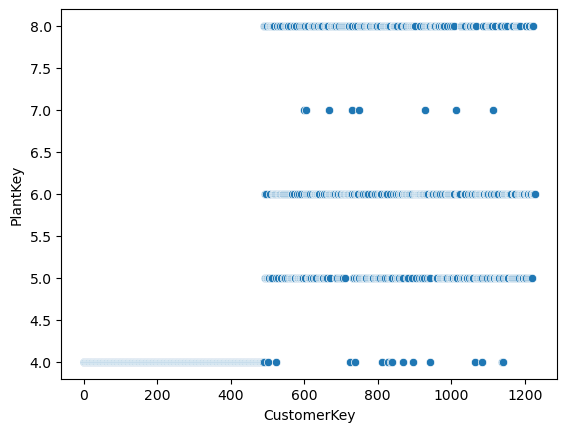

In [43]:
sns.scatterplot(data=cust, x='CustomerKey', y='PlantKey')
plt.show()

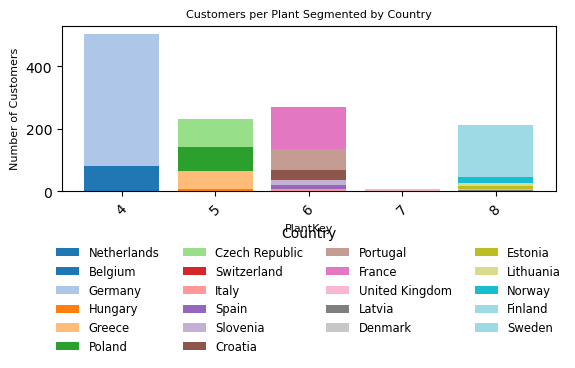

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example of restructuring data for this purpose
# This assumes cust contains columns for CustomerCountry, PlantKey, and CustomerKey (or equivalent customer identifier)
data_aggregated = cust.groupby(['PlantKey', 'CustomerCountry']).agg({
    'CustomerKey': 'count'  # Count of customers by PlantKey and CustomerCountry
}).reset_index()

# Sorting (optional, for better visualization)
data_aggregated.sort_values(['PlantKey', 'CustomerKey'], inplace=True)

# Unique countries for color mapping
unique_countries = data_aggregated['CustomerCountry'].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_countries)))
country_color_map = {country: color for country, color in zip(unique_countries, colors)}

# Plotting
plt.figure(figsize=(6, 4))

previous_plant = None
bottoms = np.zeros(len(data_aggregated['PlantKey'].unique()))

for _, row in data_aggregated.iterrows():
    plant_index = np.where(data_aggregated['PlantKey'].unique() == row['PlantKey'])[0][0]
    plt.bar(row['PlantKey'], row['CustomerKey'], bottom=bottoms[plant_index], 
            color=country_color_map[row['CustomerCountry']], label=row['CustomerCountry'])
    bottoms[plant_index] += row['CustomerKey']

plt.title('Customers per Plant Segmented by Country', size = 8)
plt.xlabel('PlantKey', size = 8)
plt.ylabel('Number of Customers', size = 8)
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=4, fontsize='small', frameon=False)
#plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [9]:
frcst_file = os.path.join(data_directory, 'Forecast.csv')
frcst = pd.read_csv(frcst_file)
print(frcst.head(2))
print(frcst.shape)

   Unnamed: 0 RequestedDeliveryMonth  MaterialKey  PlantKey  Quantity  \
0           1             2022-01-01            1         4     15978   
1           2             2022-01-01            1         5      5360   

   MaterialPlantKey  
0             10004  
1             10005  
(480, 6)


In [10]:
# Inventory.csv
inventory_file = os.path.join(data_directory, 'Inventory.csv')
inventory = pd.read_csv(inventory_file)
print("Inventory.csv:")
print(inventory.head(2))
print(inventory.shape)

Inventory.csv:
   Unnamed: 0  MaterialKey  PlantKey  MaterialPlantKey SnapshotDate  \
0           1            1         4             10004   2021-12-31   
1           2            1         5             10005   2021-12-31   

   GrossInventoryQuantity  OnShelfInventoryQuantity  InTransitQuantity  
0                  1753.0                      1626              127.0  
1                   794.0                       746               48.0  
(260, 8)


In [11]:
# MaterialPlantRelation.csv
material_plant_relation_file = os.path.join(data_directory, 'MaterialPlantRelation.csv')
material_plant_relation = pd.read_csv(material_plant_relation_file)
print("MaterialPlantRelation.csv:")
print(material_plant_relation.head(2))
print(material_plant_relation.shape)

MaterialPlantRelation.csv:
   Unnamed: 0  MaterialKey  PlantKey  MaterialPlantKey  VendorKey  \
0           1            1         4             10004       1001   
1           2            1         5             10005       1002   

   StandardCost Currency  ProductionTime  InboundTransportationTime  \
0       2680.05      EUR              20                          1   
1      11547.17      PLN              20                          1   

   GoodReceiptProcessingTime  TotalInboundLeadTime  SafetyStockQty  
0                          2                    23          1000.0  
1                          2                    23           500.0  
(109, 12)


In [12]:
# Materials.csv
materials_file = os.path.join(data_directory, 'Materials.csv')
materials = pd.read_csv(materials_file)
print("Materials.csv:")
print(materials.head(2))
print(materials.shape)

Materials.csv:
   Unnamed: 0  Material  MaterialKey      MaterialType MaterialDescription  \
0           1  EVCB-001            1  Finished Product      EV Car Battery   
1           2    HB-001            2  Finished Product        Home Battery   

       Product Category Component  
0   EV Car Battery - FP       NaN  
1  EV Home Battery - FP       NaN  
(33, 7)


In [15]:
# Plants.csv
plants_file = os.path.join(data_directory, 'Plants.csv')
plants = pd.read_csv(plants_file)
print("Plants.csv:")
print(plants)
print(plants.shape)

Plants.csv:
   Unnamed: 0  PlantKey Plant            PlantType           PlantName  \
0           1         1  ANT1           Production  Antwerp Production   
1           2         2  WRO1           Production  Wrocław Production   
2           3         3  LYO1           Production     Lyon Production   
3           4         4  ANT2  Distribution Center          Antwerp DC   
4           5         5  WRO2  Distribution Center          Wrocław DC   
5           6         6  LYO2  Distribution Center             Lyon DC   
6           7         7  BIR2  Distribution Center       Birmingham DC   
7           8         8  GOT2  Distribution Center         Göteborg DC   

    PlantCity PlantPostalCode             PlantStreet  
0     Antwerp            2030             Scheldelaan  
1     Wrocław          54-202                Legnicka  
2        Lyon           69160      Av. Mathieu Misery  
3     Antwerp            2030             Scheldelaan  
4     Wrocław          54-202            

In [70]:
# Purchases.csv
purchases_file = os.path.join(data_directory, 'Purchases.csv')
purchases = pd.read_csv(purchases_file)
print("Purchases.csv:")
print(purchases.head(2))
print(purchases.shape)

Purchases.csv:
   PurchaseOrder PurchaseOrderCreationDate  VendorKey  PlantKey  MaterialKey  \
0     4500000001                2023-06-07       1002         5            1   
1     4500000002                2023-03-05       1001         7            1   

   MaterialPlantKey  PurchaseOrderQuantity PlannedGoodsReceiptDate  \
0             10005                     69              2023-06-30   
1             10007                     80              2023-03-28   

  ActualGoodsReceiptDate PlannedArrivalDateYard ActualArrivalDateYard  \
0             2023-07-04             2023-06-28            2023-07-02   
1             2023-03-24             2023-03-26            2023-03-26   

  PlannedVendorShipmentDate ActualVendorShipmentDate  
0                2023-06-27               2023-07-01  
1                2023-03-25               2023-03-25  
(20000, 13)


In [69]:
# Sales.csv
sales_file = os.path.join(data_directory, 'Sales.csv')
sales = pd.read_csv(sales_file)
print("Sales.csv:")
print(sales.head(2))
print(sales.shape)

Sales.csv:
   SalesOrder  SalesOrderItem SalesOrderCreationDate  CustomerKey  \
0    10000001              10             2024-10-08          349   
1    10000002              10             2023-05-27          759   

   MaterialKey  OrderQuantity  PlantKey  MaterialPlantKey SalesDocType  \
0            1             26         4             10004      Regular   
1            1             20         5             10005      Regular   

  RequestedDeliveryDate DeliveryDate  HighOrderQtyFlag  
0            2024-11-15   2024-11-15                 0  
1            2023-06-15   2023-06-12                 0  
(100000, 12)


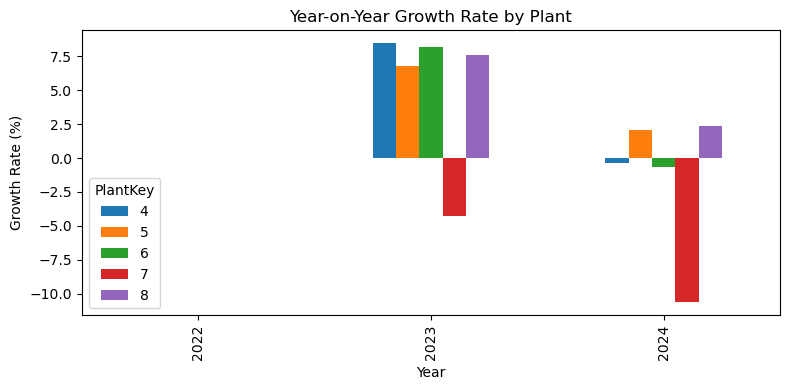

In [52]:
# Extract year from delivery_date

# Convert 'delivery_date' from string to datetime
sales['RequestedDeliveryDate'] = pd.to_datetime(sales['RequestedDeliveryDate'])
sales['Year'] = sales['RequestedDeliveryDate'].dt.year

sales_4_aggregation = sales[sales['Year'] != 2025]
# Aggregate sales data by plant and year
aggregated_sales = sales_4_aggregation.groupby(['PlantKey', 'Year']).agg(total_sales=('OrderQuantity', 'sum')).reset_index()

# Calculate year-on-year growth rate
aggregated_sales['growth_rate'] = aggregated_sales.groupby('PlantKey')['total_sales'].pct_change() * 100

# Pivot for easier plotting
pivot_data = aggregated_sales.pivot(index='Year', columns='PlantKey', values='growth_rate')

# Plotting
pivot_data.plot(kind='bar', figsize=(8, 4))
plt.title('Year-on-Year Growth Rate by Plant')
plt.ylabel('Growth Rate (%)')
plt.xlabel('Year')
plt.legend(title='PlantKey')
plt.tight_layout()
plt.show()

C:\Users\irina\AppData\Local\Temp\ipykernel_15436\1739718390.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['QuarterStr'] = filtered_data['Quarter'].astype(str)


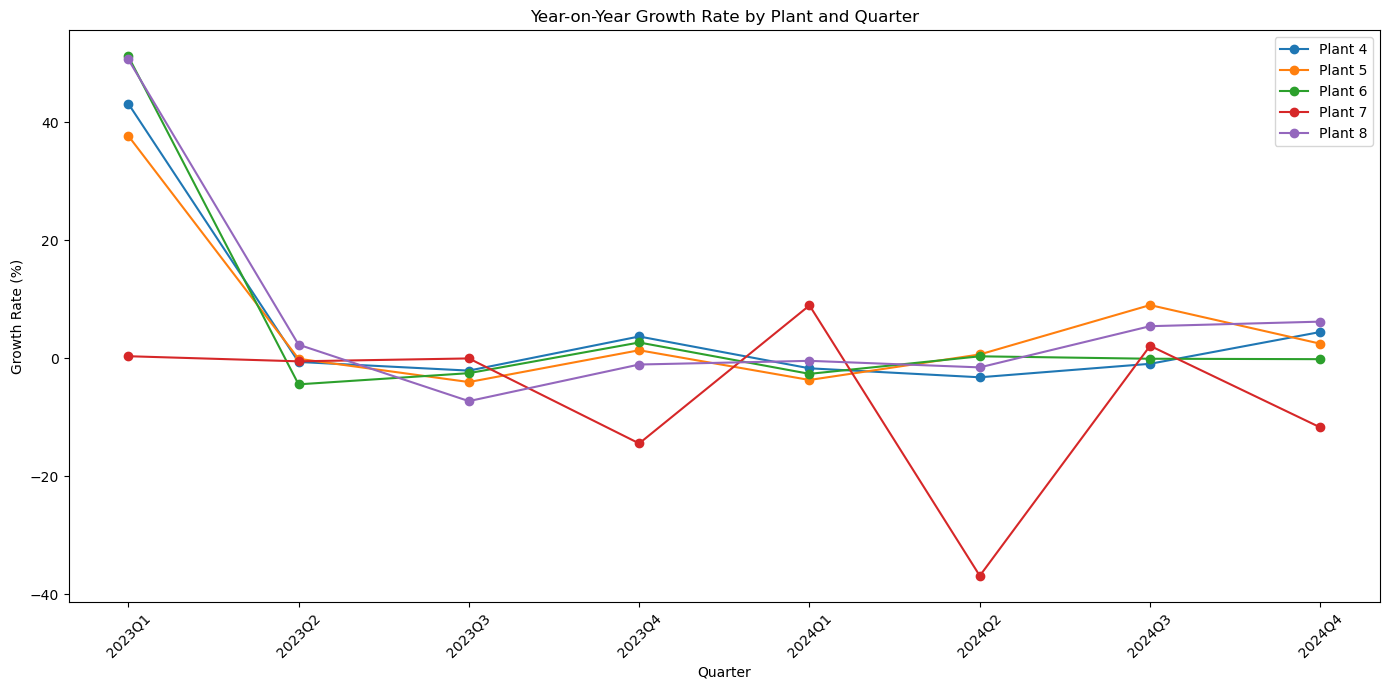

In [77]:
# Convert 'RequestedDeliveryDate' from string to datetime if not already
sales['RequestedDeliveryDate'] = pd.to_datetime(sales['RequestedDeliveryDate'])

# Extract Year and Quarter
sales['Year'] = sales['RequestedDeliveryDate'].dt.year
sales_filtered = sales[sales['Year'] != 2025]

sales['Quarter'] = sales['RequestedDeliveryDate'].dt.to_period('Q')


aggregated_sales = sales_filtered.groupby(['PlantKey', 'Year', 'Quarter']).agg(total_sales=('OrderQuantity', 'sum')).reset_index()

aggregated_sales.sort_values(by=['PlantKey', 'Quarter'], inplace=True)

def calculate_growth(group):
    # Shift sales data by 4 to compare the same quarter in the consecutive year
    group['previous_sales'] = group['total_sales'].shift(4)  # Assuming 4 quarters per year
    # Calculate the growth rate
    group['growth_rate'] = (group['total_sales'] - group['previous_sales']) / group['previous_sales'] * 100
    return group

# Apply the function to each PlantKey group
aggregated_sales = aggregated_sales.groupby('PlantKey').apply(calculate_growth)

# Drop the 'previous_sales' column if it's no longer needed
aggregated_sales.drop(columns=['previous_sales'], inplace=True)

#aggregated_sales

# Filter out rows where 'growth_rate' is NaN
filtered_data = aggregated_sales.dropna(subset=['growth_rate'])

# Since 'Quarter' is a Period object, we'll convert it to string for easier plotting
filtered_data['QuarterStr'] = filtered_data['Quarter'].astype(str)

# Plotting
plt.figure(figsize=(14, 7))  # Set the figure size as needed

for plant_key in filtered_data['PlantKey'].unique():
    plant_data = filtered_data[filtered_data['PlantKey'] == plant_key]
    plt.plot(plant_data['QuarterStr'], plant_data['growth_rate'], marker='o', label=f'Plant {plant_key}')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylabel('Growth Rate (%)')
plt.xlabel('Quarter')
plt.title('Year-on-Year Growth Rate by Plant and Quarter')
plt.legend()
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()


In [59]:
# sales year
# Requested Delivery Date vs Delivery Date 
country_sales = pd.merge(cust, sales, on='CustomerKey')
# Aggregate sales by country and find the most common PlantKey for each country
# sales_and_plant_by_country = country_sales.groupby('CustomerCountry').agg({
#     'OrderQuantity': 'sum',  # Sum of sales
#     'PlantKey': lambda x: x.mode()[0]  # Most common PlantKey
# }).reset_index()

country_sales.head(5)
#sales_and_plant_by_country
# # Sorting by sales for better visualization
# sales_and_plant_by_country.sort_values('OrderQuantity', inplace=True)

# # Step 3: Prepare color mapping
# unique_plants = sales_and_plant_by_country['PlantKey'].unique()
# colors = plt.cm.tab20(np.linspace(0, 1, len(unique_plants)))
# plant_color_map = {plant: color for plant, color in zip(unique_plants, colors)}

# # Step 4: Plotting
# plt.figure(figsize=(10, 4))
# for _, row in sales_and_plant_by_country.iterrows():
#     plt.bar(row['CustomerCountry'], row['OrderQuantity'], color=plant_color_map[row['PlantKey']])

# plt.title('Sales per Country')
# plt.ylabel('Order Quantity')
# plt.xticks(rotation=45, size=8)

# # Creating a legend
# from matplotlib.patches import Patch
# legend_elements = [Patch(facecolor=plant_color_map[plant], label=plant) for plant in unique_plants]
# plt.legend(handles=legend_elements, title='PlantKey', bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.tight_layout()
# plt.show()

,Unnamed: 0_x,CustomerKey,CustomerName,CustomerCountry,CustomerCity,CustomerPostalCode,CustomerStreet,PlantKey_x,Unnamed: 0_y,SalesOrder,SalesOrderItem,SalesOrderCreationDate,MaterialKey,OrderQuantity,PlantKey_y,MaterialPlantKey,SalesDocType,RequestedDeliveryDate,DeliveryDate,HighOrderQtyFlag
0,1,1,O'Hara-MacGyver,Germany,Hamburg,22041,36 Westport Court,4,680,10000680,10,2024-07-21,2,18,4,20004,Regular,2024-08-26,2024-09-09,0
1,1,1,O'Hara-MacGyver,Germany,Hamburg,22041,36 Westport Court,4,731,10000731,10,2024-02-06,2,19,4,20004,Regular,2024-03-04,2024-02-28,0
2,1,1,O'Hara-MacGyver,Germany,Hamburg,22041,36 Westport Court,4,757,10000757,10,2022-06-01,1,16,4,10004,Regular,2022-07-01,2022-06-30,0
3,1,1,O'Hara-MacGyver,Germany,Hamburg,22041,36 Westport Court,4,3345,10003345,10,2022-11-13,1,19,4,10004,Regular,2022-12-29,2022-12-27,0
4,1,1,O'Hara-MacGyver,Germany,Hamburg,22041,36 Westport Court,4,3473,10003473,10,2022-05-11,2,20,4,20004,Regular,2022-05-30,2022-05-25,0


In [18]:
# Vendors.csv
vendors_file = os.path.join(data_directory, 'Vendors.csv')
vendors = pd.read_csv(vendors_file)
print("Vendors.csv:")
print(vendors.head(2))
print(vendors.shape)

Vendors.csv:
   Unnamed: 0  VendorKey VendorTier          VendorName VendorCountry  \
0           1       1001         T0  Antwerp Production       Belgium   
1           2       1002         T0  Wrocław Production        Poland   

  VendorCity VendorPostalCode VendorStreet  
0    Antwerp             2030  Scheldelaan  
1    Wrocław           54-202     Legnicka  
(9, 8)


In [93]:
sales.head(2)

,SalesOrder,SalesOrderItem,SalesOrderCreationDate,CustomerKey,MaterialKey,OrderQuantity,PlantKey,MaterialPlantKey,SalesDocType,RequestedDeliveryDate,DeliveryDate,HighOrderQtyFlag,Year,Quarter,RequestedDeliveryMonth,Quantity
0,10000001,10,2024-10-08,349,1,26,4,10004,Regular,2024-11-15,2024-11-15,0,2024,2024Q4,2024-11,26
1,10000002,10,2023-05-27,759,1,20,5,10005,Regular,2023-06-15,2023-06-12,0,2023,2023Q2,2023-06,20


In [82]:
sales['RequestedDeliveryMonth'] = sales['RequestedDeliveryDate'].dt.to_period('M')
sales['Quantity'] = sales['OrderQuantity']

In [79]:
frcst.head(2)

,Unnamed: 0,RequestedDeliveryMonth,MaterialKey,PlantKey,Quantity,MaterialPlantKey
0,1,2022-01-01,1,4,15978,10004
1,2,2022-01-01,1,5,5360,10005


In [96]:
frcst['RequestedDeliveryMonth'] = pd.to_datetime(frcst['RequestedDeliveryMonth'])
frcst['RequestedDeliveryMonth'] = frcst['RequestedDeliveryMonth'].dt.to_period('M')

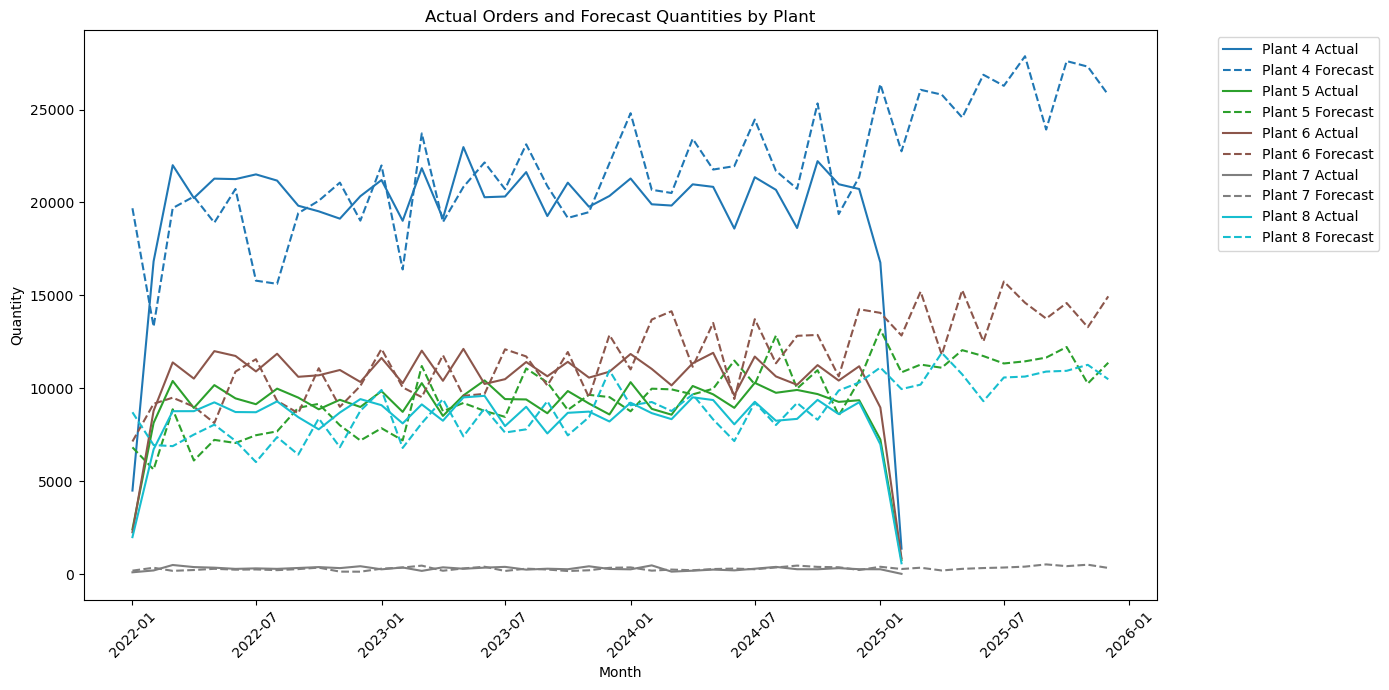

In [101]:
actual_sales_agg = sales.groupby([sales['RequestedDeliveryMonth'], 'PlantKey']).agg(total_actual=('Quantity', 'sum')).reset_index()
forecast_data_agg = frcst.groupby([frcst['RequestedDeliveryMonth'], 'PlantKey']).agg(total_forecast=('Quantity', 'sum')).reset_index()

# # Convert periods back to datetime for easier plotting
actual_sales_agg['RequestedDeliveryMonth']  = actual_sales_agg['RequestedDeliveryMonth'].dt.to_timestamp()
forecast_data_agg['RequestedDeliveryMonth'] = forecast_data_agg['RequestedDeliveryMonth'].dt.to_timestamp()

# Step 3: Combine the Actual and Forecast Data
# For plotting, it's easier if they are in the same DataFrame, but distinguished by a type column
actual_sales_agg['Type'] = 'Actual'
forecast_data_agg['Type'] = 'Forecast'

combined_data = pd.concat([actual_sales_agg.rename(columns={'total_actual': 'Quantity'}),
                           forecast_data_agg.rename(columns={'total_forecast': 'Quantity'})])

plt.figure(figsize=(14, 7))

# Generate a color map for plants
plants = combined_data['PlantKey'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(plants)))  # Adjust based on the number of plants
color_map = dict(zip(plants, colors))

for plant_key in plants:
    plant_data = combined_data[combined_data['PlantKey'] == plant_key]
    for type_key in ['Actual', 'Forecast']:
        type_data = plant_data[plant_data['Type'] == type_key]
        # Use the same color for both actual and forecast, but vary the linestyle
        linestyle = '-' if type_key == 'Actual' else '--'  # Solid line for actual, dotted line for forecast
        plt.plot(type_data['RequestedDeliveryMonth'], type_data['Quantity'], label=f'Plant {plant_key} {type_key}',
                 color=color_map[plant_key], linestyle=linestyle)

plt.xticks(rotation=45)
plt.ylabel('Quantity')
plt.xlabel('Month')
plt.title('Actual Orders and Forecast Quantities by Plant')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position to not overlap the plot
plt.tight_layout()
plt.show()